# Encapsulamiento en Programación Orientada a Objetos

Bienvenido/a. En esta lección aprenderás el principio de encapsulamiento, esencial para proteger y organizar los datos en tus programas orientados a objetos.

## Objetivos
- Comprender qué es el encapsulamiento y su importancia en POO.
- Aplicar el control de acceso a los atributos y métodos de una clase.
- Relacionar el encapsulamiento con ejemplos de la vida real.

---

**Ejemplo de la vida real:** Piensa en una cuenta bancaria: solo puedes interactuar con ella a través de un cajero o una app, pero no puedes acceder directamente al sistema interno del banco. Eso es encapsulamiento.

# Encapsulamiento en Programación Orientada a Objetos

El encapsulamiento es uno de los principios fundamentales de la Programación Orientada a Objetos. Se refiere a la agrupación de datos y los métodos que operan sobre esos datos dentro de una unidad o clase. Además, implica la restricción del acceso directo a algunos de los componentes del objeto.

## Explicación
El encapsulamiento permite:

1. **Ocultar la implementación interna**: Los detalles de cómo se implementa una clase se mantienen ocultos del mundo exterior.

2. **Control de acceso**: Se puede controlar cómo y qué partes del objeto son accesibles desde fuera de la clase.

3. **Flexibilidad y mantenibilidad**: Permite cambiar la implementación interna sin afectar el código que usa la clase.

4. **Integridad de datos**: Ayuda a mantener los datos en un estado consistente al restringir el acceso directo.

## Ejemplo práctico

En este ejemplo:

1. `CuentaBancaria` encapsula los datos (`__titular` y `__saldo`) y los métodos que operan sobre ellos.

2. Los atributos `__titular` y `__saldo` son privados (indicado por el doble guion bajo).

3. Se proporcionan métodos públicos (`depositar`, `retirar`, `obtener_saldo`, `obtener_titular`) para interactuar con los datos privados.

4. Los métodos `depositar` y `retirar` incluyen lógica para mantener la integridad de los datos.

5. El acceso directo a `__saldo` desde fuera de la clase resulta en un error.

@startuml
class CuentaBancaria {
    - titular: str
    - saldo: float
    + depositar(cantidad): bool
    + retirar(cantidad): bool
    + obtener_saldo(): float
    + obtener_titular(): str
}
@enduml

https://editor.plantuml.com/uml/TOun2iCm34Ltdq9ZGka5F8Ns84MnLJ2eLf7agVJkTO8xPCWV_uF7MynHlRqu94Opk3UgZZUi2RKWV0BqNS6BDqQDOAxZCkGi4PuiwFjrWKnliTA5KyBg9MEU8wmYFBYI5psbiZfLqiSkdkQZ-Wz7o8Qtb6zOgEQU_mC0

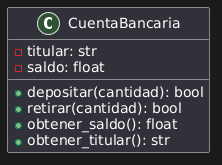

In [1]:
class CuentaBancaria:
    def __init__(self, titular: str, saldo_inicial: float) -> None:
        self.__titular: str = titular
        self.__saldo: float = saldo_inicial

    def depositar(self, cantidad: float) -> bool:
        if cantidad > 0:
            self.__saldo += cantidad
            return True
        return False

    def retirar(self, cantidad: float) -> bool:
        if 0 < cantidad <= self.__saldo:
            self.__saldo -= cantidad
            return True
        return False

    def obtener_saldo(self) -> float:
        return self.__saldo

    def obtener_titular(self) -> str:
        return self.__titular

In [2]:
cuenta = CuentaBancaria(titular="Juan Pérez", saldo_inicial=1000)
print(f"Saldo inicial: {cuenta.obtener_saldo()}")

cuenta.depositar(500)
print(f"Saldo después del depósito: {cuenta.obtener_saldo()}")

cuenta.retirar(200)
print(f"Saldo después del retiro: {cuenta.obtener_saldo()}")


Saldo inicial: 1000
Saldo después del depósito: 1500
Saldo después del retiro: 1300


In [3]:
# Intentando acceder directamente a los atributos privados
try:
    print(cuenta.__saldo)
except AttributeError as e:
    print(f"Error: {e}")

# Accediendo a los atributos privados usando name mangling
print(cuenta._CuentaBancaria__saldo)
print(cuenta._CuentaBancaria__titular)

Error: 'CuentaBancaria' object has no attribute '__saldo'
1300
Juan Pérez


In [4]:
# Accediendo a los atributos privados usando name mangling
print(cuenta._CuentaBancaria__saldo)
print(cuenta._CuentaBancaria__titular)

# Listado de métodos y atributos de la clase
print(dir(cuenta))

1300
Juan Pérez
['_CuentaBancaria__saldo', '_CuentaBancaria__titular', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'depositar', 'obtener_saldo', 'obtener_titular', 'retirar']


## Características del encapsulamiento en Python

Python utiliza una forma de encapsulamiento basada en convenciones, conocida como "name mangling":

- Los atributos con doble guion bajo (`__`) al principio se "manglan" para dificultar el acceso desde fuera de la clase.

- Esto no es una restricción estricta, sino una convención que dificulta el acceso accidental.

- Se puede acceder a estos atributos usando `_NombreClase__atributo`, aunque no se recomienda.

## Beneficios del encapsulamiento en este ejemplo

1. **Protección de datos**: El saldo no puede ser modificado directamente, solo a través de métodos controlados.

2. **Validación de datos**: Los métodos `depositar` y `retirar` aseguran que las operaciones sean válidas.

3. **Abstracción**: Los usuarios de la clase no necesitan conocer cómo se almacena o maneja internamente el saldo.

4. **Flexibilidad**: La implementación interna puede cambiar sin afectar el código que usa la clase.

## Conclusión

El encapsulamiento es una herramienta poderosa en la POO que permite crear código más robusto, mantenible y seguro. Ofrece varias ventajas:

- **Seguridad de datos**: Protege los datos de accesos y modificaciones no autorizados.

- **Modularidad**: Facilita el desarrollo y mantenimiento de código al separar la interfaz de la implementación.

- **Flexibilidad**: Permite cambiar la implementación interna sin afectar el código externo.

- **Abstracción**: Simplifica el uso de la clase al ocultar detalles innecesarios.

Sin embargo, es importante recordar que en Python, el encapsulamiento es más una convención que una restricción estricta. Los desarrolladores deben respetar estas convenciones para aprovechar plenamente los beneficios del encapsulamiento.

En el desarrollo de software moderno, el encapsulamiento se utiliza ampliamente para crear APIs limpias y robustas, mejorar la seguridad de los datos y facilitar el mantenimiento del código a largo plazo. Dominar el concepto de encapsulamiento es esencial para cualquier desarrollador que trabaje con programación orientada a objetos, ya que permite crear sistemas más organizados, seguros y fáciles de mantener.

## Ejercicios prácticos y preguntas de reflexión

1. Crea una clase `CajaFuerte` con un atributo privado `__codigo` y métodos para guardar y extraer objetos solo si el código es correcto.
2. Modifica la clase `CuentaBancaria` para agregar un método que permita cambiar el titular solo si se proporciona una contraseña correcta.
3. ¿Por qué es importante restringir el acceso directo a los atributos de una clase?

### Autoevaluación
- ¿Qué ventajas aporta el encapsulamiento al desarrollo de software?
- ¿Puedes dar un ejemplo de encapsulamiento en tu vida diaria?

![Autenticacion](//www.plantuml.com/plantuml/png/NOzD3i9024RtSufPrgWNS5LFqb3AOf8fa_3ZndWep-359Dh6MfOFlWVqQY3cSqrOGJLVtOYj861fdEyfHvs7mTL1IhjaDLaPDZO1fTSJ_ZYiYYdcnzPg-dIEXGiMa459mzrjbQUybns-6IIHNsI1f1Rk7KIOnx1lh-e0pQ4k6zZfjheVgIUUukit)

In [5]:
class SistemaAutenticacion:
    def __init__(self, usuario: str, contraseña: str):
        self.__usuario: str = usuario
        self.__contraseña: str = contraseña
        self.__autenticado: bool = False

    def iniciar_sesion(self, usuario: str, contraseña: str) -> str:
        if usuario == self.__usuario and contraseña == self.__contraseña:
            self.__autenticado = True
            return "Bienvenido"
        return "Usuario o contraseña incorrectos"

    def cerrar_sesion(self) -> str:
        self.__autenticado = False
        return "Sesión cerrada correctamente"

    def estado_sesion(self) -> None:
        if self.__autenticado:
            print("Sesión activa")
        else:
            print("No hay una sesión activa")

    def cambiar_contraseña(self, actual: str, nueva: str) -> str:
        if actual == self.__contraseña:
            self.__contraseña = nueva
            return "Contraseña actualizada con exito"
        return "La contraseña actual no correcta"

In [6]:
# Crear una instancia del sistema con usuario y contraseña
auth = SistemaAutenticacion("jesus", "clave123")

# Inicio de sesión
print(auth.iniciar_sesion("jesus", "clave123"))
auth.estado_sesion()

# Cerrar sesión
print(auth.cerrar_sesion())  # → Sesión cerrada correctamente
auth.estado_sesion()  # → Sesión no iniciada


Bienvenido
Sesión activa
Sesión cerrada correctamente
No hay una sesión activa


In [8]:
# Intentar visualizar atributos privados
print(auth.__usuario)
print(auth.__contraseña)

AttributeError: 'SistemaAutenticacion' object has no attribute '__contraseña'

## Referencias y recursos
- [Documentación oficial de Python: clases y encapsulamiento](https://docs.python.org/es/3/tutorial/classes.html)
- [Encapsulamiento en Python - W3Schools](https://www.w3schools.com/python/python_classes.asp)
- [Visualizador de objetos Python Tutor](https://pythontutor.com/)